# 非線形回帰問題 勾配降下法

## データセットの作成

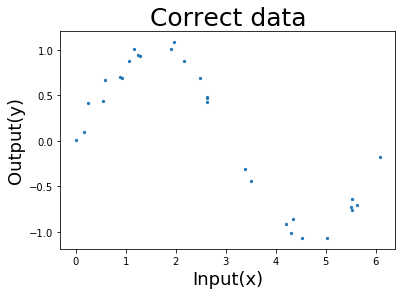

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#seed値
np.random.seed(1)

#X(入力データ)の作成
#↓サンプル数
num_of_sam = 30
#↓サンプルmin値
min_of_sam = 0
#↓サンプルmax値
max_of_sam = 2*np.pi
#↓minからmaxまでnumの数だけランダムに数を生成
X = np.random.uniform(min_of_sam,max_of_sam,num_of_sam)

#T(正解データ)の生成
#↓ノイズの作成
noise = np.random.normal(0,0.1,num_of_sam)
#↓ノイズを足し合わせる
T = np.sin(X)+noise

#プロットを行う
#↓正解データを点でプロット
plt.scatter(X,T,s=5)
plt.title("Correct data",fontsize=25)
plt.xlabel("Input(x)",fontsize=18)
plt.ylabel("Output(y)",fontsize=18)
plt.show()

## 重みWとバイアスBの学習

In [27]:
#恒等関数の作成
def identity(x):
    return x

#シグモイド関数の作成
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#二乗和誤差の関数を作成
def square_sum(Y,T):
    return np.sum(np.square(Y-T))/2

#隠れ層のニューロン数
dimention = 50

#重みの生成(初期値は平均0,分散1の乱数)
W1 = np.random.randn(dimention,1)
W2 = np.random.randn(1,dimention)

#バイアスの生成(初期値は平均0,分散1の乱数)
B1 = np.random.randn(dimention,1)
B2 = np.random.randn(1,1)

#速度の生成(初期値は0)
W1_vel = np.zeros_like(W1)
W2_vel = np.zeros_like(W2)
B1_vel = np.zeros_like(B1)
B2_vel = np.zeros_like(B2)

#学習率の設定
eta = 0.0001
#慣性の強さ
alpha = 0.9
#損失関数の推移保存リスト
E_save = np.array([])
#イテレーション数の設定
iteration = 5000

#学習
for i in range(iteration):
    #--順伝番 forward propagation--
    #↓中間層の出力の計算
    H = sigmoid(X*W1+B1)
    #↓出力の計算
    Y = identity(np.dot(W2,H)+B2)
    #↓損失の計算(二乗和誤差を用いる)
    E = square_sum(Y,T)
    #↓損失の保存
    E_save = np.append(E_save,E)
    
    #differential
    dW2 = np.sum(H*(Y-T),axis=1)
    dB2 = np.sum(Y-T)
    dW1 = W2*np.sum(X*H*(1-H)*(Y-T),axis=1)
    dB1 = W2*np.sum(H*(1-H)*(Y-T))
    
    #速度の保存
    W1_vel = -eta*dW1.T+alpha*W1_vel
    W2_vel = -eta*dW2+alpha*W2_vel
    B1_vel = -eta*dB1.T+alpha*B1_vel
    B2_vel = -eta*dB2+alpha*B2_vel
    
    #逆伝番 back propagation
    W1 = W1+W1_vel
    W2 = W2+W2_vel
    B1 = B1+B1_vel
    B2 = B2+B2_vel
    

## 学習結果のプロット

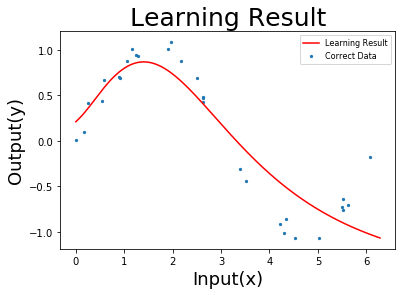

In [28]:
X_line = np.linspace(0*np.pi, max_of_sam+0*np.pi, 200)
H_line = sigmoid(X_line*W1+B1)
Y_line = np.ravel(np.dot(W2,H_line)+B2)

plt.scatter(X, T,s=5,label="Correct Data")
plt.plot(X_line, Y_line,"red",label="Learning Result")
plt.title("Learning Result",fontsize=25)
plt.xlabel("Input(x)",fontsize=18)
plt.ylabel("Output(y)",fontsize=18)
plt.legend(fontsize=8)
plt.show()

## 損失推移のプロット

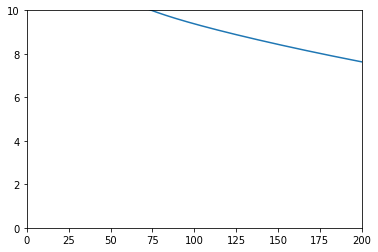

In [29]:
#プロットを行う
#↓損失とイテレーション数の関係を点でプロット
plt.plot(E_save)
plt.xlim(0,200)
plt.ylim(0,10)
plt.show()